In [1]:
# For developments outside of the controlgym working directory: use pip install controlgym==1.0.0 to install the package
import numpy as np
import controlgym as gym

### Example 1: Applying a zero controller to the allen_cahn environment

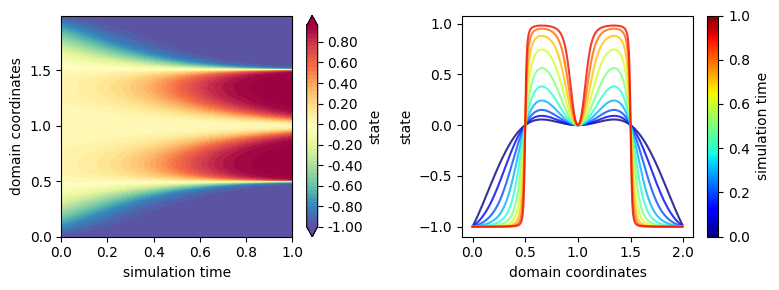

In [6]:
allen_cahn_env = gym.make("allen_cahn")
zero_controller = gym.controllers.Zero(allen_cahn_env)
# For PDE environments, env.select_init_state(**kwargs) can be used to select a specific
# initial condition, which complys with the initial state distribution of the environment
allen_cahn_init_state = allen_cahn_env.select_init_state(init_offset=0.0)
# The env.reset() function draws an initial state from a random distribution
# For conducting evaluation with a deterministic initial condition, say s,
# use the optional argument through env.reset(state=s)
# alternatively when using the built-in controllers,use controller.run(state=s)
zero_controller.run(state=allen_cahn_init_state)
gym.save(zero_controller, temp_save=False, display=True, contour=True, surface3d=False, dpi=300);

### Example 2: Applying the LQG controller to the he1 environment

LQG controller reward: -1.3702060799182951


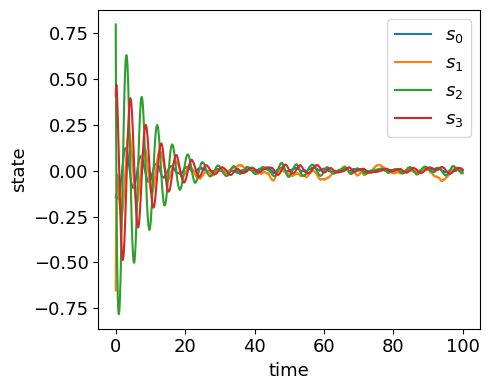

In [3]:
he1_env = gym.make("he1")
lqg_controller1 = gym.controllers.LQG(he1_env)
print(f"LQG controller reward: {lqg_controller1.run()}")
gym.save(lqg_controller1, temp_save=False, display=True, dpi=300);

### Example 3: Applying the PPO controller to the he1 environment

In [2]:
# Import pytorch and check if GPU is available
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
# Train PPO controller
he1_env = gym.make("he1")
ppo_controller1 = gym.controllers.PPO(he1_env, actor_hidden_dim=64, critic_hidden_dim=64, lr=1e-5, discount_factor=0.99, device=device)
print(f"PPO reward before training: {ppo_controller1.run()}")
ppo_controller1.train(num_train_iter=100, num_episodes_per_iter=64, episode_length=100, sgd_epoch_num=4, mini_batch_size=5, cov_param=0.05)
print(f"PPO reward after training: {ppo_controller1.run()}")

PPO reward before training: -1.392868572659367e+21
Iteration:  0 , Average Rewards:  -11328.566494458904
Iteration:  1 , Average Rewards:  -8767.605495442816
Iteration:  2 , Average Rewards:  -6859.0118636549405
Iteration:  3 , Average Rewards:  -6656.963859461887
Iteration:  4 , Average Rewards:  -5179.282240329399
Iteration:  5 , Average Rewards:  -6066.68645216281
Iteration:  6 , Average Rewards:  -3733.0519916977382
Iteration:  7 , Average Rewards:  -5350.518599705409
Iteration:  8 , Average Rewards:  -3794.4846124653895
Iteration:  9 , Average Rewards:  -3405.4621185901506
Iteration:  10 , Average Rewards:  -3577.1803555644547
Iteration:  11 , Average Rewards:  -2532.662353023593
Iteration:  12 , Average Rewards:  -2804.5906391043595
Iteration:  13 , Average Rewards:  -3287.3396953121783
Iteration:  14 , Average Rewards:  -2859.942717142345
Iteration:  15 , Average Rewards:  -2193.922816100156
Iteration:  16 , Average Rewards:  -2499.889999458914
Iteration:  17 , Average Rewards: 

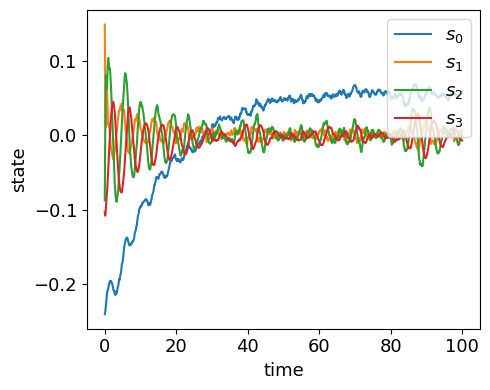

In [6]:
# Display the state trajectory controlled by the convergent PPO controller
# Due to the stochastic nature of the algorithm, the plot might not look the same as the one in the paper
gym.save(ppo_controller1, temp_save=False, display=True, dpi=300);

### Example 4: Applying the LQG controller to the wave environment

LQG controller reward: -2478.9447509479446


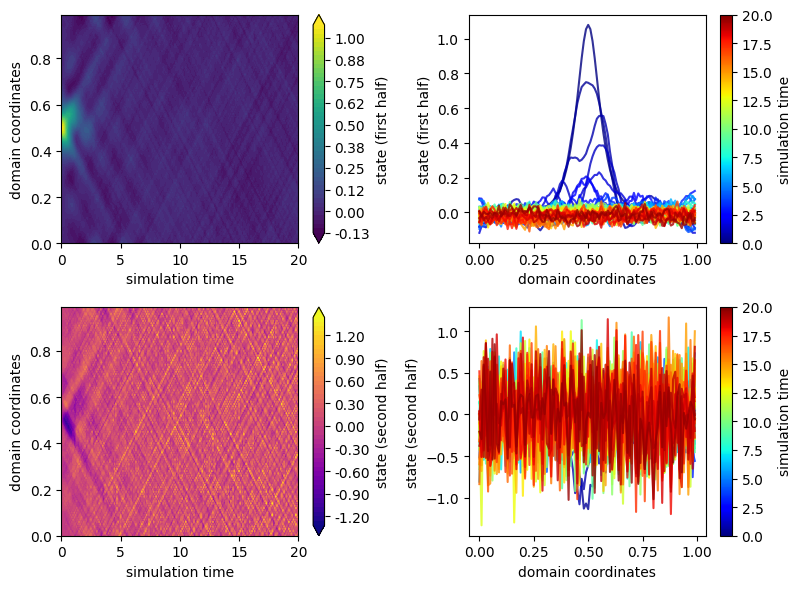

In [3]:
wave_env = gym.make("wave", process_noise_cov=1e-5, sensor_noise_cov=0.05)
lqg_controller2 = gym.controllers.LQG(wave_env)
print(f"LQG controller reward: {lqg_controller2.run()}")
gym.save(lqg_controller2, temp_save=False, display=True, contour=True, surface3d=False, dpi=300);

### Example 5: Applying the PPO controller to the Burgers environment

In [5]:
burgers_env = gym.make("burgers", n_state=64, process_noise_cov=1e-5, sensor_noise_cov=0.05)
# Choose a non-zero target state to track
burgers_target = 0.1 * np.cos(2 * np.pi * burgers_env.domain_coordinates / burgers_env.domain_length)
burgers_env.set_target_state(state=burgers_target)
# Instantiate and train the PPO controller
ppo_controller2 = gym.controllers.PPO(burgers_env, actor_hidden_dim = 64, critic_hidden_dim = 64, lr = 1e-5, discount_factor=0.99, device=device)
print(f"Reward before training: {ppo_controller2.run()}")
ppo_controller2.train(num_train_iter=50, num_episodes_per_iter=32, episode_length=100, sgd_epoch_num=4, mini_batch_size=5, cov_param=0.05)
print(f"Reward after training: {ppo_controller2.run()}")

Reward before training: -416.6320372300905
Iteration:  0 , Average Rewards:  -395.4300610722628
Iteration:  1 , Average Rewards:  -371.9027661577907
Iteration:  2 , Average Rewards:  -339.2900434249249
Iteration:  3 , Average Rewards:  -306.8558466924077
Iteration:  4 , Average Rewards:  -367.7675826843216
Iteration:  5 , Average Rewards:  -304.22514610077815
Iteration:  6 , Average Rewards:  -322.69341579262914
Iteration:  7 , Average Rewards:  -294.63302322084877
Iteration:  8 , Average Rewards:  -290.31188761416956
Iteration:  9 , Average Rewards:  -288.3489002630101
Iteration:  10 , Average Rewards:  -270.6034293284638
Iteration:  11 , Average Rewards:  -288.4898993541914
Iteration:  12 , Average Rewards:  -270.11151167127093
Iteration:  13 , Average Rewards:  -259.53249952852735
Iteration:  14 , Average Rewards:  -245.05453500523794
Iteration:  15 , Average Rewards:  -264.6859979494244
Iteration:  16 , Average Rewards:  -254.4747289716922
Iteration:  17 , Average Rewards:  -255.95

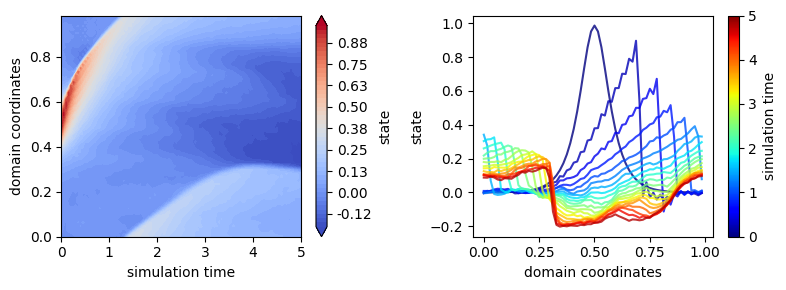

In [6]:
# Plot the state trajectory controlled by the convergent PPO controller
# Due to the stochastic nature of the algorithm, the plot might not look the same as the one in the paper
gym.save(ppo_controller2, temp_save=False, display=True, dpi=300);

### Example 6: Applying RL algorithms from stable-baseline3

In [8]:
# Required stable-baselines3 to be installed (pip3 install stable-baselines3)
from stable_baselines3 import SAC

In [11]:
def rollout_reward(env, model):
    reward_sum = 0.0
    obs, info = env.reset()
    state_traj = np.zeros((env.n_state, env.n_steps + 1))
    state_traj[:, 0] = info["state"]
    for t in range(env.n_steps):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, _, _, info = env.step(action)
        state_traj[:, t + 1] = info["state"]
        reward_sum += reward
    env.state_traj = state_traj
    return reward_sum

toy_env = gym.make("toy", n_steps=100, action_limit=10, observation_limit=10)            
sac_controller = SAC("MlpPolicy", toy_env, verbose=1, batch_size=64, learning_rate=1e-5, policy_kwargs={'log_std_init': -3.0})
print(f"SAC reward before training: {rollout_reward(toy_env, sac_controller)}")
sac_controller.learn(total_timesteps=10000)
print(f"SAC reward after training: {rollout_reward(toy_env, sac_controller)}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
SAC reward before training: -492.3940606153891
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 100       |
|    ep_rew_mean     | -4.04e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 212       |
|    time_elapsed    | 1         |
|    total_timesteps | 400       |
| train/             |           |
|    actor_loss      | 0.989     |
|    critic_loss     | 1.69e+03  |
|    ent_coef        | 0.997     |
|    ent_coef_loss   | -0.00507  |
|    learning_rate   | 1e-05     |
|    n_updates       | 299       |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 100       |
|    ep_rew_mean     | -3.84e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 180       |
|    time_elapsed  

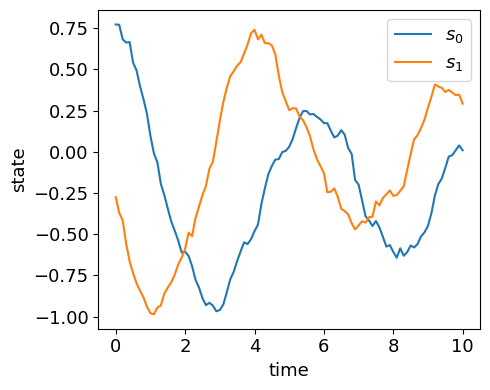

In [12]:
# plot the state trajectory controlled by the convergent SAC controller
sac_controller.env = toy_env
gym.save(sac_controller, temp_save=False, display=True, dpi=300);